# 超参数调优和五折交叉验证

In [ ]:
import os, time, json, warnings
import numpy as np, pandas as pd, matplotlib.pyplot as plt
import paddle, paddle.nn as nn
from paddle.io import DataLoader, TensorDataset
from sklearn.model_selection import KFold

warnings.filterwarnings('ignore')

# 可选：设置设备
try:
    paddle.set_device('iluvatar_gpu:0')
except Exception:
    paddle.set_device('cpu')
print("device:", paddle.device.get_device())
from hyperparameter_tuning_final_paddle import HyperparameterOptimizer, setup_chinese_font
setup_chinese_font()

/opt/conda/envs/python35-paddle120-env/lib/python3.10/site-packages/paddle/utils/cpp_extension/extension_utils.py:719: UserWarning: No ccache found. Please be aware that recompiling all source files may be required. You can download and install ccache from: https://github.com/ccache/ccache/blob/master/doc/INSTALL.md
  warnings.warn(warning_message)
I1231 11:07:19.606905   581 init.cc:238] ENV [CUSTOM_DEVICE_ROOT]=/opt/conda/envs/python35-paddle120-env/lib/python3.10/site-packages/paddle_custom_device
I1231 11:07:19.606974   581 init.cc:146] Try loading custom device libs from: [/opt/conda/envs/python35-paddle120-env/lib/python3.10/site-packages/paddle_custom_device]
I1231 11:07:20.072652   581 custom_device_load.cc:51] Succeed in loading custom runtime in lib: /opt/conda/envs/python35-paddle120-env/lib/python3.10/site-packages/paddle_custom_device/libpaddle-iluvatar-gpu.so
I1231 11:07:20.072703   581 custom_device_load.cc:58] Skipped lib [/opt/conda/envs/python35-paddle120-env/lib/pyth

device: iluvatar_gpu:0
使用文泉驿中文字体


True

In [2]:
weights_default = 'trained_models/traffic_sign_cnn_paddle_final_20251228_003218.pdparams'
use_pretrained = os.path.exists(weights_default)
opt = HyperparameterOptimizer(model_type='standard', weights_path=weights_default, use_pretrained=use_pretrained)

模型类型: standard | 设备: iluvatar_gpu:0


## k折交叉验证

K折交叉验证: 5 折 | epochs=10 | batch_size=32
从processed_data加载预处理数据...
数据加载成功！
  训练集形状: (27446, 64, 64, 3) - 标签: 27446
  验证集形状: (5881, 64, 64, 3) - 标签: 5881
  测试集形状: (5882, 64, 64, 3) - 标签: 5882

数据统计:
  训练集范围: [0.000, 1.000]
  训练集均值: 0.337, 标准差: 0.266
  标签唯一值: 43, 范围: [0, 42]
Fold 1 - Epoch 01/10 | train_loss: 1.0834, train_acc: 0.6674 | val_loss: 1.1002, val_acc: 0.6607
Fold 1 - Epoch 02/10 | train_loss: 0.2880, train_acc: 0.9169 | val_loss: 0.3088, val_acc: 0.9092
Fold 1 - Epoch 03/10 | train_loss: 0.0829, train_acc: 0.9794 | val_loss: 0.0973, val_acc: 0.9751
Fold 1 - Epoch 04/10 | train_loss: 0.0614, train_acc: 0.9841 | val_loss: 0.0721, val_acc: 0.9791
Fold 1 - Epoch 05/10 | train_loss: 0.0222, train_acc: 0.9947 | val_loss: 0.0331, val_acc: 0.9893
Fold 1 - Epoch 06/10 | train_loss: 0.0134, train_acc: 0.9971 | val_loss: 0.0196, val_acc: 0.9952
Fold 1 - Epoch 07/10 | train_loss: 0.0129, train_acc: 0.9974 | val_loss: 0.0224, val_acc: 0.9950
Fold 1 - Epoch 08/10 | train_loss: 0.0093, train

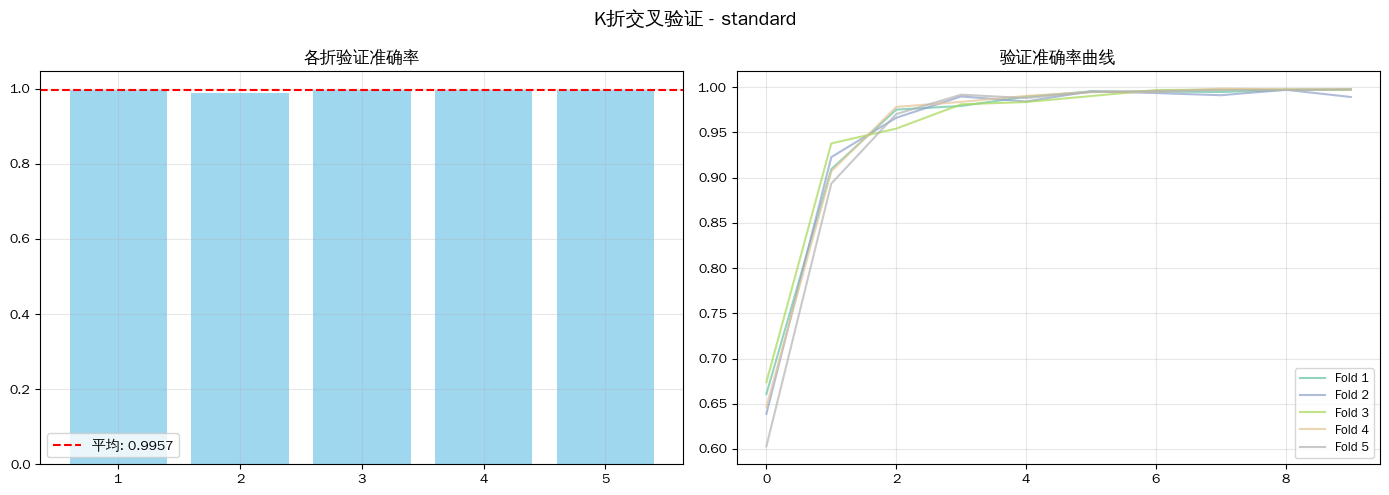

保存: /home/aistudio/work/hyperparameter_tuning_result/detailed_training_curves.png


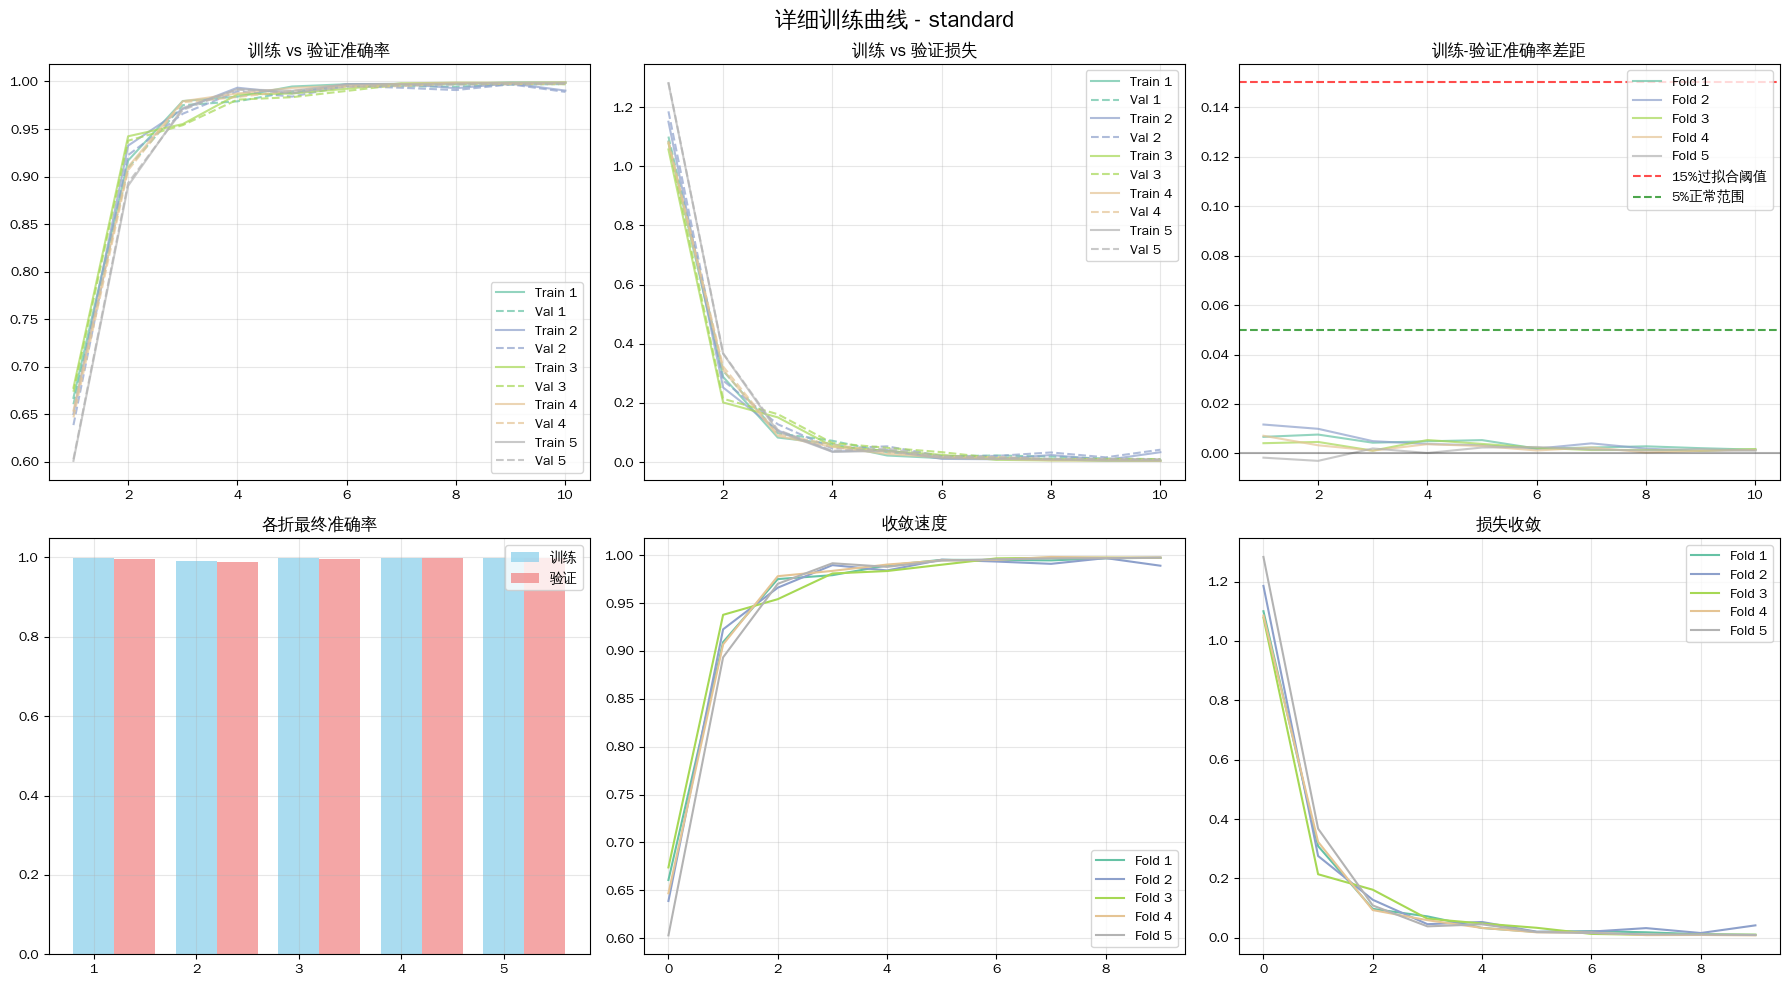

(0.9957093368751728, 0.0033335923081861847)

In [3]:
# 5-fold CV
opt.kfold_cross_validation(n_splits=5, epochs=10, batch_size=32)

## 随机搜索

随机搜索: 20 次 | 5 折 | epochs=5
从processed_data加载预处理数据...
数据加载成功！
  训练集形状: (27446, 64, 64, 3) - 标签: 27446
  验证集形状: (5881, 64, 64, 3) - 标签: 5881
  测试集形状: (5882, 64, 64, 3) - 标签: 5882

数据统计:
  训练集范围: [0.000, 1.000]
  训练集均值: 0.337, 标准差: 0.266
  标签唯一值: 43, 范围: [0, 42]
Iter 1: {'learning_rate': 0.0005, 'batch_size': 16, 'optimizer_type': 'rmsprop', 'iteration': 1, 'mean_accuracy': 0.978666106670682, 'std_accuracy': 0.004237908358201285, 'fold_accuracies': [0.9764476447644764, 0.9755475547554755, 0.9741935483870968, 0.981695423855964, 0.9854463615903976]} | mean_acc=0.9787
Iter 2: {'learning_rate': 0.0005, 'batch_size': 128, 'optimizer_type': 'rmsprop', 'iteration': 2, 'mean_accuracy': 0.7946398795918601, 'std_accuracy': 0.05028659145672548, 'fold_accuracies': [0.8574857485748575, 0.7685268526852685, 0.7608402100525131, 0.7345836459114778, 0.8517629407351838]} | mean_acc=0.7946
Iter 3: {'learning_rate': 0.0005, 'batch_size': 128, 'optimizer_type': 'rmsprop', 'iteration': 3, 'mean_accuracy': 0.81

[2025-12-31 12:06:02,260] [ WARNING] _mathtext.py:649 - Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
[2025-12-31 12:06:02,264] [ WARNING] _mathtext.py:649 - Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
[2025-12-31 12:06:02,267] [ WARNING] _mathtext.py:649 - Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
[2025-12-31 12:06:02,270] [ WARNING] _mathtext.py:649 - Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
[2025-12-31 12:06:02,272] [ WARNING] _mathtext.py:649 - Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
[2025-12-31 12:06:02,275] [ WARNING] _mathtext.py:649 - Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.


Iter 20: {'learning_rate': 0.01, 'batch_size': 32, 'optimizer_type': 'rmsprop', 'iteration': 20, 'mean_accuracy': 0.8671676019815034, 'std_accuracy': 0.0994967419135036, 'fold_accuracies': [0.8220822082208221, 0.8175817581758176, 0.9779444861215304, 0.9867966991747937, 0.7314328582145536]} | mean_acc=0.8672
保存: /home/aistudio/work/hyperparameter_tuning_result/random_search_results.json
保存: /home/aistudio/work/hyperparameter_tuning_result/search_results.csv

超参数影响分析/最佳组合
best: lr=0.005 bs=16 opt=adamw acc=0.9929
learning_rate:
                   mean       std  count
learning_rate                           
0.0001         0.310460  0.138057      4
0.0005         0.740143  0.338608      8
0.0010         0.967218  0.033248      2
0.0050         0.992124  0.001082      2
0.0100         0.959913  0.061835      4
batch_size:
                mean       std  count
batch_size                           
16          0.988188  0.005283      6
32          0.810735  0.281203      8
64          0.176

[2025-12-31 12:06:02,427] [ WARNING] _mathtext.py:649 - Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
[2025-12-31 12:06:02,430] [ WARNING] _mathtext.py:649 - Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
[2025-12-31 12:06:02,432] [ WARNING] _mathtext.py:649 - Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
[2025-12-31 12:06:02,435] [ WARNING] _mathtext.py:649 - Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
[2025-12-31 12:06:02,437] [ WARNING] _mathtext.py:649 - Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
[2025-12-31 12:06:02,440] [ WARNING] _mathtext.py:649 - Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
[2025-12-31 12:06:02,638] [ WARNING] _mathtext.py:649 - Font 'default' does not have a glyph for '\u

保存: /home/aistudio/work/hyperparameter_tuning_result/search_analysis.png


[2025-12-31 12:06:03,249] [ WARNING] _mathtext.py:649 - Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
[2025-12-31 12:06:03,252] [ WARNING] _mathtext.py:649 - Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
[2025-12-31 12:06:03,254] [ WARNING] _mathtext.py:649 - Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
[2025-12-31 12:06:03,257] [ WARNING] _mathtext.py:649 - Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.


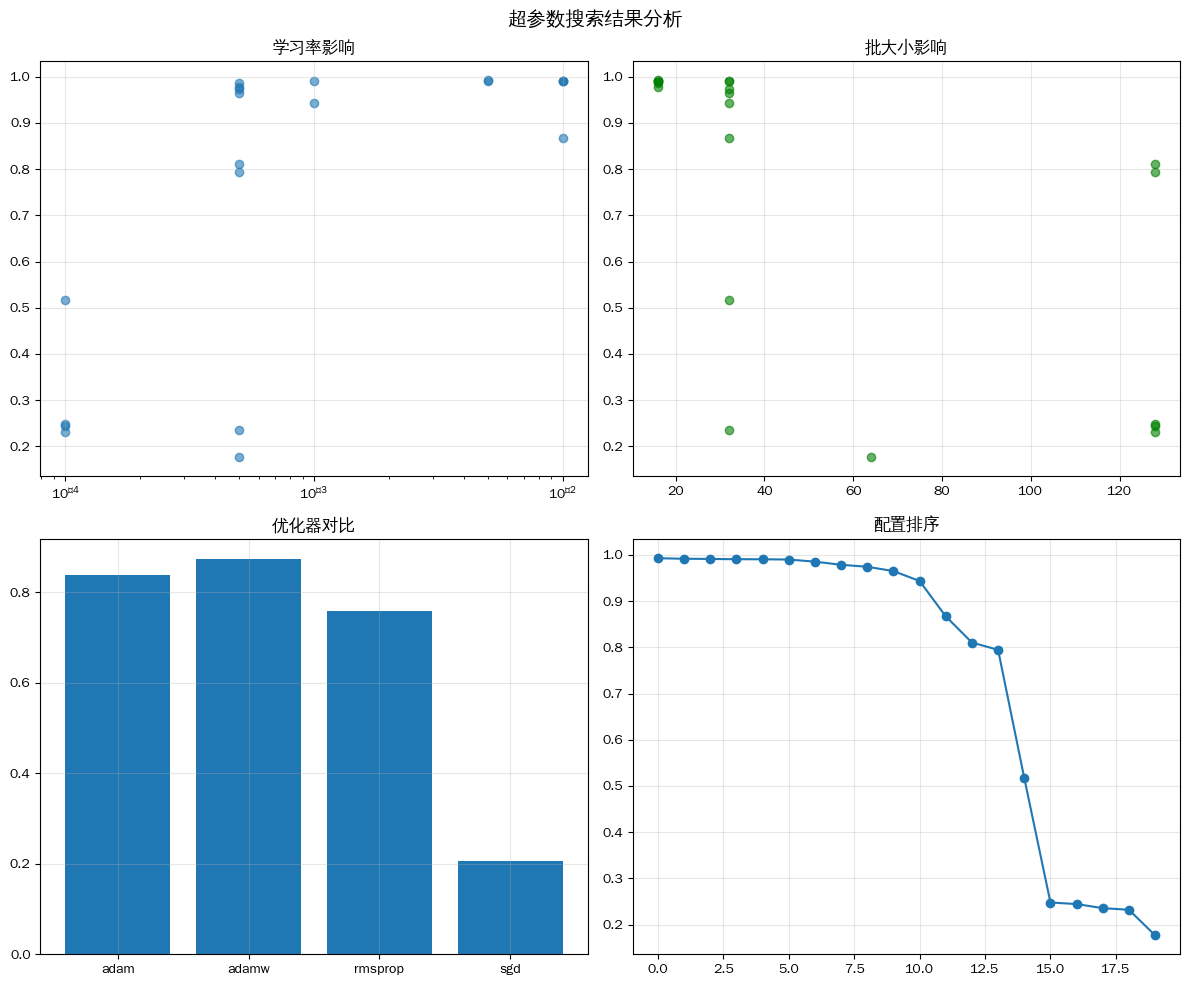

best: {'learning_rate': 0.005, 'batch_size': 16, 'optimizer_type': 'adamw', 'iteration': 12, 'mean_accuracy': 0.992888582181549, 'std_accuracy': 0.0029180792533245845, 'fold_accuracies': [0.9954995499549955, 0.9924992499249925, 0.994748687171793, 0.9942985746436609, 0.9873968492123031]} 0.992888582181549


In [4]:
# 随机搜索
best_params, best_score = opt.random_search(n_iter=20, n_folds=5, epochs=5)
print("best:", best_params, best_score)